[nltk_data] Downloading package stopwords to /Users/pr472/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


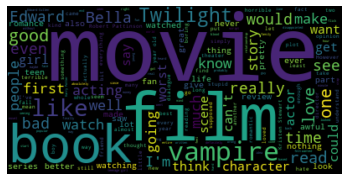

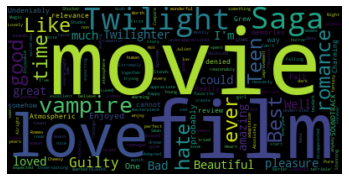

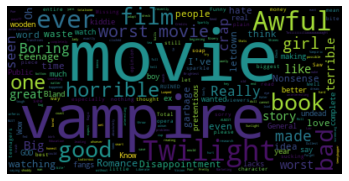

(array([0, 1, 2]),
 [Text(0, 0, 'Bella'), Text(1, 0, 'Edward'), Text(2, 0, 'Jacob')])

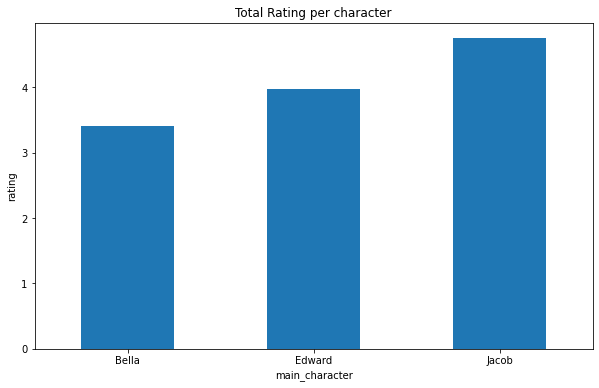

In [135]:
# Importing required libraries
import matplotlib.pyplot as plot
import seaborn as sbr
color = sbr.color_palette()
%matplotlib inline
import plotly.offline as plty
plty.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as xp
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud

# Creating a dataframe for the ratings scraped from the imdb website 
df = pd.read_csv('/Users/pr472/Desktop/Harry_Potter_Movies/Dialogue.csv')
df.head()

# Histogram representing ratings given by audiance from 0 to 10
fig = xp.histogram(df, x="Rating")
fig.update_traces(marker_color="darkgray",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Ratings')
fig.show()


# Creating wordcloud for the reviews using stopwords
stopwords = stopwords.words('english')
text = " ".join(review for review in df.Review)
wordcloud = WordCloud(stopwords=stopwords).generate(text)
plot.imshow(wordcloud, interpolation='bilinear')
plot.axis("off")
plot.savefig('/Users/pr472/Desktop/Masters/Fall-22/Data Acquisition and Pre-Processing/Final_Project/wordcloud11.png')
plot.show()

# Considering reviews with rating less than 5 as negative review and above 5 as positive review
df['sentiment'] = df['Rating'].apply(lambda rating : +1 if rating > 5 else -1)

# spliting dataframe into positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]


# Creating wordcloud for negative reviews and positive reviews
pos = " ".join(review for review in positive.Review_Title)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plot.imshow(wordcloud2, interpolation='bilinear')
plot.axis("off")
plot.savefig('/Users/pr472/Desktop/Masters/Fall-22/Data Acquisition and Pre-Processing/Final_Project/wordcloud_pos.png')

plot.show()

neg = " ".join(review for review in negative.Review_Title)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plot.imshow(wordcloud3, interpolation='bilinear')
plot.axis("off")
plot.savefig('/Users/pr472/Desktop/Masters/Fall-22/Data Acquisition and Pre-Processing/Final_Project/wordcloud_neg.png')

plot.show()

# Histogram representing negative and positive reviews

df['sentiment'] = df['sentiment'].replace({-1 : 'negative'})
df['sentiment'] = df['sentiment'].replace({1 : 'positive'})
fig = xp.histogram(df, x="sentiment")
fig.update_traces(marker_color="darkgray",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Movie Sentiment')
fig.show()

# Bargraph representing ratings for main characters in the movie. 

char = ['Bella','Edward','Jacob']
char_rate = []
for i in range(len(char)):
    for j in range(len(df)):
        if char[i] in df.Review[j]:
            x = char[i], df.Rating[j]
            char_rate.append(x)
char_rating = pd.DataFrame (char_rate, columns = ['char', 'rating'])
char_rating_groups_1 = char_rating.groupby(['char'])['rating'].mean()
char_rating_groups_1.plot(kind='bar', title='Total Rating per character',
               ylabel='rating', xlabel='main_character', figsize=(10, 6))

plt.xticks(rotation=0)


(array([0, 1, 2]),
 [Text(0, 0, 'Kristen Stewart'),
  Text(1, 0, 'Robert Pattinson'),
  Text(2, 0, 'Taylor Lautner')])

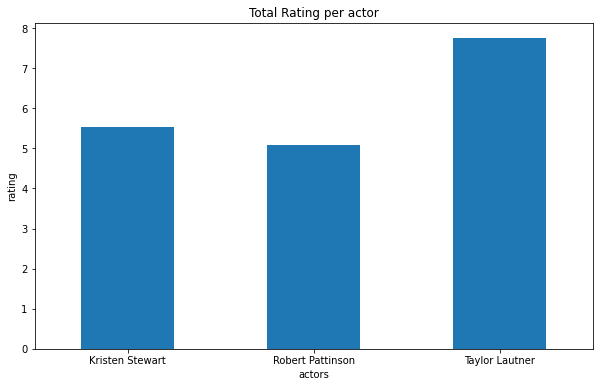

In [113]:
actor = ['Kristen Stewart','Robert Pattinson','Taylor Lautner']
actor_rate = []
for i in range(len(actor)):
    for j in range(len(df)):
        if actor[i] in df.Review[j]:
            x = actor[i], df.Rating[j]
            actor_rate.append(x)
actor_rating = pd.DataFrame (actor_rate, columns = ['actor', 'rating'])


actor_rating_groups_2 = actor_rating.groupby(['actor'])['rating'].mean()

actor_rating_groups_2.plot(kind='bar', title='Total Rating per actor',
               ylabel='rating', xlabel='actors', figsize=(10, 6))
plt.xticks(rotation=0)


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


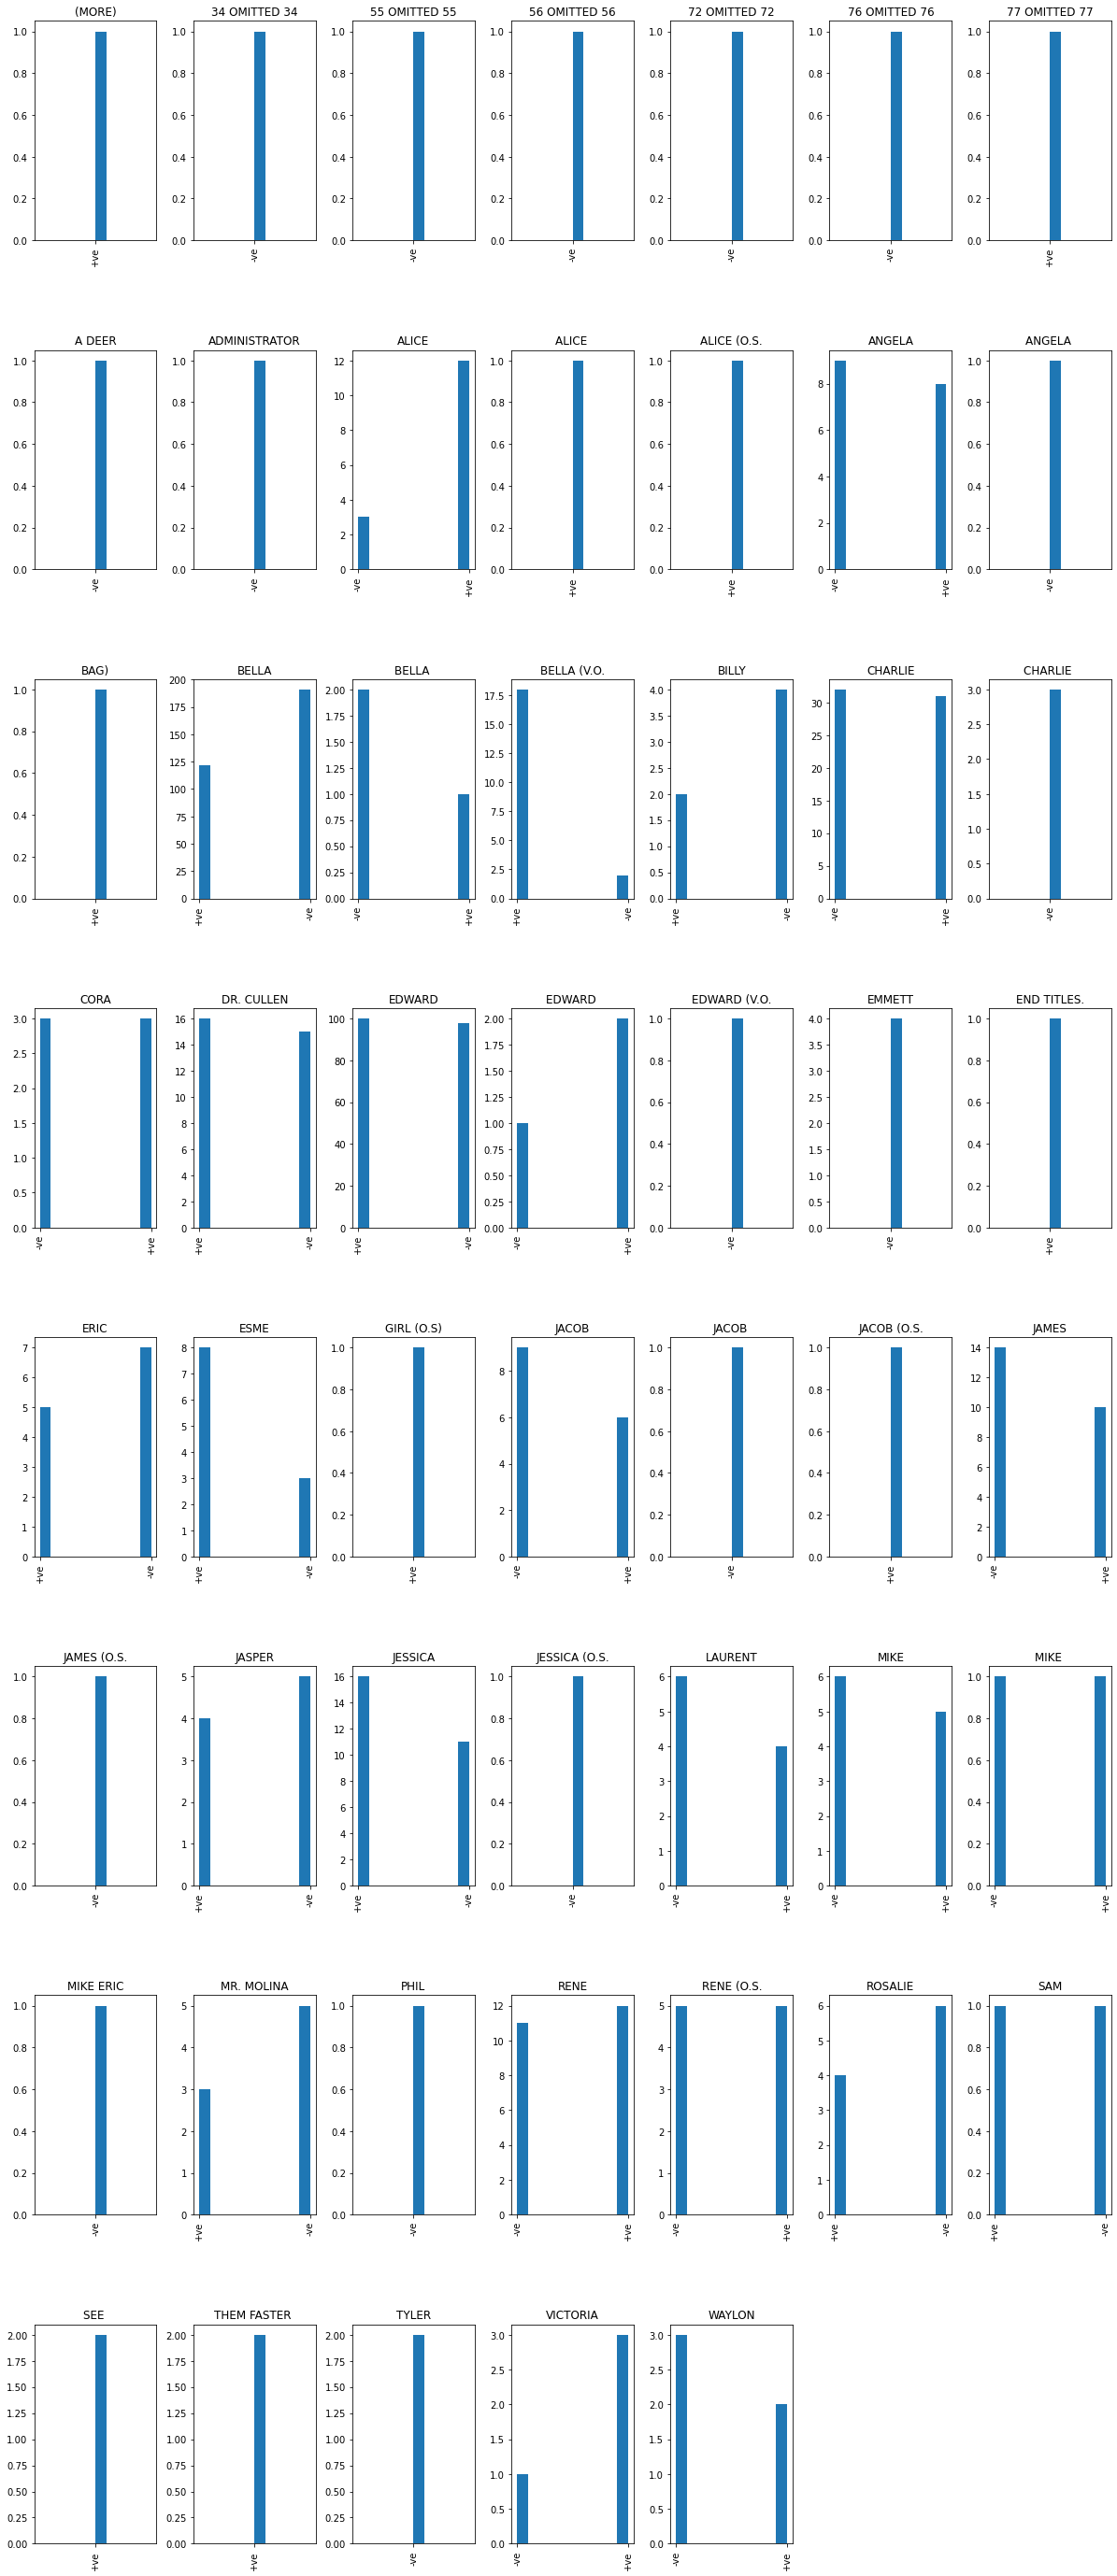

In [133]:
# Importing required libraries

import transformers
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sbr
color = sbr.color_palette()
%matplotlib inline
import plotly.offline as plty
plty.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as xp
import csv

df1 = pd.read_csv('/Users/pr472/Desktop/Masters/Fall-22/Data Acquisition and Pre-Processing/Final_Project/TWILIGHT1.csv')
df1.head()
sentiment_pipeline = pipeline("sentiment-analysis")
data = []
for dialogue in df1.dialogue:
    if dialogue != "Narration":
        data.append(dialogue)
sentiment = []
for text in data:
    dlg = [{"dialogue": text}]
    emotion = sentiment_pipeline(text) + dlg
    d = [{k:v for x in emotion for k,v in x.items()}]
    sentiment.extend(d)
    
header = ["label","score", "dialogue"]

with open('/Users/pr472/Desktop/Masters/Fall-22/Data Acquisition and Pre-Processing/Final_Project/TWILIGHT-senti.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames = header)
    writer.writeheader()
    writer.writerows(sentiment) #saved into csv

df2 = pd.read_csv('/Users/pr472/Desktop/Masters/Fall-22/Data Acquisition and Pre-Processing/Final_Project/TWILIGHT-senti.csv')
df2.head()

merged_data = df1.merge(df2,on=["dialogue"])
merged_data.to_csv("/Users/pr472/Desktop/Masters/Fall-22/Data Acquisition and Pre-Processing/Final_Project/Final_TWILIGHT-senti.csv")

df = pd.read_csv("/Users/pr472/Desktop/Masters/Fall-22/Data Acquisition and Pre-Processing/Final_Project/Final_TWILIGHT-senti.csv")
df.head()

df['sentiment'] = df['label'].apply(lambda label : +1 if label == 'POSITIVE' else -1)

# spliting dataframe into positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

# Histogram representing negative and positive dialogues

df['sentiment'] = df['sentiment'].replace({-1 : '-ve'})
df['sentiment'] = df['sentiment'].replace({1 : '+ve'})
fig = xp.histogram(df, x="sentiment")
fig.update_traces(marker_color="darkgray",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Sentiment on dialogue')
fig.show()

# histogram representing negative and positive of each characters
ax = df.hist(column='sentiment', by='speaker',figsize=(20,50))
plt.show()

